In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def timeSequence(sampleRate, timeDuration, timeIncrement):
    samplesNumber = sampleRate * timeDuration
    return np.arange(samplesNumber) * timeIncrement
#enddef

In [3]:
def sineWave(amplitude, frequency, timeSequence):
    omega = (2 * np.pi) * frequency
    return np.sin(omega * timeSequence) * amplitude
#enddef

In [4]:
#Default Parameters for time sequence
sampleRate = 44100 #samples in a second
timeDuration = 0.1 #total seconds
timeIncrement = 1 / sampleRate #time increment (duration of a sample)
amplitude = 1

#Default time axis
time = timeSequence(sampleRate, timeDuration, timeIncrement)

trainArrayLF = []
trainArrayHF = []

In [7]:
from random import randint

def generateSineWaves(startFreq, endFreq, sineArray):
    step = randint(3, 7)
    for i in range(startFreq, endFreq, step):
        sineArray.append(sineWave(amplitude, i, time))
        step = randint(3, 7)
#enddef

In [8]:
generateSineWaves(100, 3000, trainArrayLF)
generateSineWaves(5000, 7900, trainArrayHF)

print(len(trainArrayLF))
print(len(trainArrayHF))

trainVectorLF = np.zeros((len(trainArrayLF), 1))
trainVectorHF = np.ones((len(trainArrayHF), 1))

967
415


In [9]:
def addNoise(sineArray, noiseArray):
    for i in range (0, len(sineArray), 1):
        for j in range (0, len(sineArray[i]), 1):
            sineArray[i][j] = sineArray[i][j] + noiseArray[j]
#enddef

noiseArray = np.random.normal(0,0.15, 4410)

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4410, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(441, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(220, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001, momentum=1e-08), loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
trainArrayLF.extend(trainArrayHF)
trainArray = np.asarray(trainArrayLF)
trainVector = np.append(trainVectorLF, trainVectorHF, axis=0)

print(trainArray.shape)
print(trainVector.shape)

(1382, 4410)
(1382, 1)


In [12]:
model.fit(trainArray, trainVector, epochs=500)

Train on 1382 samples
Epoch 1/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.7035 - accuracy: 0.5159
Epoch 2/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.6279 - accuracy: 0.6954
Epoch 3/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.6086 - accuracy: 0.6997
Epoch 4/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.5974 - accuracy: 0.7004
Epoch 5/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.5876 - accuracy: 0.7004
Epoch 6/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.5784 - accuracy: 0.7004
Epoch 7/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.5695 - accuracy: 0.7004
Epoch 8/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.5609 - accuracy: 0.7004
Epoch 9/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.5520 - accuracy: 0.7004
Epoch 10/500
1382/1382 [=========

1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0390 - accuracy: 1.0000
Epoch 78/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0373 - accuracy: 1.0000
Epoch 79/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0357 - accuracy: 1.0000
Epoch 80/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0342 - accuracy: 1.0000
Epoch 81/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0328 - accuracy: 1.0000
Epoch 82/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0315 - accuracy: 1.0000
Epoch 83/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0302 - accuracy: 1.0000
Epoch 84/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0291 - accuracy: 1.0000
Epoch 85/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0279 - accuracy: 1.0000
Epoch 86/500
1382/1382 [==============================] - 3

Epoch 153/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0055 - accuracy: 1.0000
Epoch 154/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0055 - accuracy: 1.0000
Epoch 155/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0054 - accuracy: 1.0000
Epoch 156/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0053 - accuracy: 1.0000
Epoch 157/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0052 - accuracy: 1.0000
Epoch 158/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0052 - accuracy: 1.0000
Epoch 159/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0051 - accuracy: 1.0000
Epoch 160/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0050 - accuracy: 1.0000
Epoch 161/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0049 - accuracy: 1.0000
Epoch 162/500
1382/1382 [============

1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0024 - accuracy: 1.0000
Epoch 230/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0024 - accuracy: 1.0000
Epoch 231/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0024 - accuracy: 1.0000
Epoch 232/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0023 - accuracy: 1.0000
Epoch 233/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0023 - accuracy: 1.0000
Epoch 234/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0023 - accuracy: 1.0000
Epoch 235/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0023 - accuracy: 1.0000
Epoch 236/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0023 - accuracy: 1.0000
Epoch 237/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0022 - accuracy: 1.0000
Epoch 238/500
1382/1382 [==========================

1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0014 - accuracy: 1.0000
Epoch 306/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0014 - accuracy: 1.0000
Epoch 307/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0014 - accuracy: 1.0000
Epoch 308/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0014 - accuracy: 1.0000
Epoch 309/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0014 - accuracy: 1.0000
Epoch 310/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0014 - accuracy: 1.0000
Epoch 311/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0014 - accuracy: 1.0000
Epoch 312/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0014 - accuracy: 1.0000
Epoch 313/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 0.0014 - accuracy: 1.0000
Epoch 314/500
1382/1382 [==========================

1382/1382 [==============================] - 3s 2ms/sample - loss: 9.8331e-04 - accuracy: 1.0000
Epoch 382/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 9.7912e-04 - accuracy: 1.0000
Epoch 383/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 9.7496e-04 - accuracy: 1.0000
Epoch 384/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 9.7077e-04 - accuracy: 1.0000
Epoch 385/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 9.6668e-04 - accuracy: 1.0000
Epoch 386/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 9.6262e-04 - accuracy: 1.0000
Epoch 387/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 9.5856e-04 - accuracy: 1.0000
Epoch 388/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 9.5459e-04 - accuracy: 1.0000
Epoch 389/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 9.5058e-04 - accuracy: 1.0000
Epoch 390/500
1

1382/1382 [==============================] - 3s 2ms/sample - loss: 7.4324e-04 - accuracy: 1.0000
Epoch 455/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 7.4069e-04 - accuracy: 1.0000
Epoch 456/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 7.3818e-04 - accuracy: 1.0000
Epoch 457/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 7.3562e-04 - accuracy: 1.0000
Epoch 458/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 7.3312e-04 - accuracy: 1.0000
Epoch 459/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 7.3061e-04 - accuracy: 1.0000
Epoch 460/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 7.2811e-04 - accuracy: 1.0000
Epoch 461/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 7.2564e-04 - accuracy: 1.0000
Epoch 462/500
1382/1382 [==============================] - 3s 2ms/sample - loss: 7.2319e-04 - accuracy: 1.0000
Epoch 463/500
1

In [13]:
def generateOneStep(startFreq, endFreq, sineArray):
    for i in range(startFreq, endFreq, 1):
        sineArray.append(sineWave(amplitude, i, time))
#enddef

testArrayLF = []
generateOneStep(1800, 2300, testArrayLF)
addNoise(testArrayLF, noiseArray)
testArrayLFNP = np.asarray(testArrayLF)

In [14]:
randomFreq = model.predict([testArrayLFNP])

startFreq=1800
for freq in randomFreq:
    print('Prediction for ', startFreq, 'Hz :', freq, '\n')
    startFreq=startFreq+1

Prediction for  1800 Hz : [0.00057245] 

Prediction for  1801 Hz : [0.00101556] 

Prediction for  1802 Hz : [0.00155646] 

Prediction for  1803 Hz : [0.00145334] 

Prediction for  1804 Hz : [0.00164994] 

Prediction for  1805 Hz : [0.00436051] 

Prediction for  1806 Hz : [0.00328074] 

Prediction for  1807 Hz : [0.00073424] 

Prediction for  1808 Hz : [0.00035559] 

Prediction for  1809 Hz : [0.00026969] 

Prediction for  1810 Hz : [0.0001437] 

Prediction for  1811 Hz : [9.7944525e-05] 

Prediction for  1812 Hz : [0.00018263] 

Prediction for  1813 Hz : [0.00038214] 

Prediction for  1814 Hz : [0.00026534] 

Prediction for  1815 Hz : [0.00021063] 

Prediction for  1816 Hz : [0.00020699] 

Prediction for  1817 Hz : [0.00032699] 

Prediction for  1818 Hz : [0.00056504] 

Prediction for  1819 Hz : [0.00068366] 

Prediction for  1820 Hz : [0.00074495] 

Prediction for  1821 Hz : [0.00101627] 

Prediction for  1822 Hz : [0.00090295] 

Prediction for  1823 Hz : [0.00060734] 

Prediction for

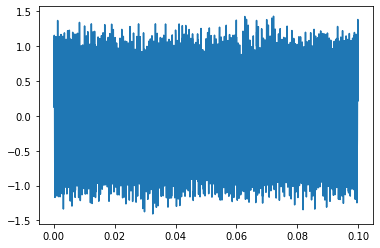

In [15]:
plt.plot(time, testArrayLFNP[5])

In [16]:
testArrayHF = []
generateOneStep(6200, 7300, testArrayHF)
addNoise(testArrayHF, noiseArray)
testArrayHFNP = np.asarray(testArrayHF)

In [18]:
randomHFreq = model.predict([testArrayHFNP])

startHFreq=6200
for freq in randomHFreq:
    print('Prediction for ', startHFreq, 'Hz :', freq, '\n')
    startHFreq=startHFreq+1

Prediction for  6200 Hz : [0.9362065] 

Prediction for  6201 Hz : [0.9569386] 

Prediction for  6202 Hz : [0.975274] 

Prediction for  6203 Hz : [0.9933988] 

Prediction for  6204 Hz : [0.9977354] 

Prediction for  6205 Hz : [0.99502325] 

Prediction for  6206 Hz : [0.9885279] 

Prediction for  6207 Hz : [0.98193043] 

Prediction for  6208 Hz : [0.9854595] 

Prediction for  6209 Hz : [0.99036294] 

Prediction for  6210 Hz : [0.9941241] 

Prediction for  6211 Hz : [0.99675506] 

Prediction for  6212 Hz : [0.99101394] 

Prediction for  6213 Hz : [0.9741431] 

Prediction for  6214 Hz : [0.98962283] 

Prediction for  6215 Hz : [0.9972236] 

Prediction for  6216 Hz : [0.9988826] 

Prediction for  6217 Hz : [0.99936527] 

Prediction for  6218 Hz : [0.99887127] 

Prediction for  6219 Hz : [0.99195427] 

Prediction for  6220 Hz : [0.9538223] 

Prediction for  6221 Hz : [0.785505] 

Prediction for  6222 Hz : [0.67975235] 

Prediction for  6223 Hz : [0.8208334] 

Prediction for  6224 Hz : [0.978

Prediction for  6714 Hz : [0.9967295] 

Prediction for  6715 Hz : [0.99854517] 

Prediction for  6716 Hz : [0.99174654] 

Prediction for  6717 Hz : [0.9378787] 

Prediction for  6718 Hz : [0.8616067] 

Prediction for  6719 Hz : [0.9326332] 

Prediction for  6720 Hz : [0.97956413] 

Prediction for  6721 Hz : [0.99540764] 

Prediction for  6722 Hz : [0.9982377] 

Prediction for  6723 Hz : [0.99719656] 

Prediction for  6724 Hz : [0.9958182] 

Prediction for  6725 Hz : [0.98825234] 

Prediction for  6726 Hz : [0.97641015] 

Prediction for  6727 Hz : [0.9766182] 

Prediction for  6728 Hz : [0.98505044] 

Prediction for  6729 Hz : [0.9970499] 

Prediction for  6730 Hz : [0.9974026] 

Prediction for  6731 Hz : [0.9883668] 

Prediction for  6732 Hz : [0.9429983] 

Prediction for  6733 Hz : [0.9548754] 

Prediction for  6734 Hz : [0.97066385] 

Prediction for  6735 Hz : [0.99543613] 

Prediction for  6736 Hz : [0.9991762] 

Prediction for  6737 Hz : [0.99750394] 

Prediction for  6738 Hz : [0.

Prediction for  7216 Hz : [0.57982445] 

Prediction for  7217 Hz : [0.87545735] 

Prediction for  7218 Hz : [0.9883459] 

Prediction for  7219 Hz : [0.99812657] 

Prediction for  7220 Hz : [0.99526393] 

Prediction for  7221 Hz : [0.9682077] 

Prediction for  7222 Hz : [0.8992229] 

Prediction for  7223 Hz : [0.8469739] 

Prediction for  7224 Hz : [0.95436555] 

Prediction for  7225 Hz : [0.9927462] 

Prediction for  7226 Hz : [0.9977076] 

Prediction for  7227 Hz : [0.9967669] 

Prediction for  7228 Hz : [0.97767365] 

Prediction for  7229 Hz : [0.82406] 

Prediction for  7230 Hz : [0.7450793] 

Prediction for  7231 Hz : [0.9278165] 

Prediction for  7232 Hz : [0.9910063] 

Prediction for  7233 Hz : [0.9966484] 

Prediction for  7234 Hz : [0.97384036] 

Prediction for  7235 Hz : [0.826278] 

Prediction for  7236 Hz : [0.58912474] 

Prediction for  7237 Hz : [0.53783876] 

Prediction for  7238 Hz : [0.80396307] 

Prediction for  7239 Hz : [0.9854731] 

Prediction for  7240 Hz : [0.9988

In [19]:
model.save('sine_waves_random_step.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: sine_waves_random_step.model\assets
